In diesem notebook wurde ein Chi-Quadrat-Test zum Zusammenhang zwischen Uneinigkeit und Ton berechnet. Außerdem werden die längeren Konversationen, in denen Uneinigkeit herrscht, geplottet.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import math

In [3]:
data = pd.read_excel('../daten/data_disagreement.xlsx')
len(data)

976

In [4]:
data_short = data.drop_duplicates(subset='5: post_id')
len(data_short)

501

In [5]:
data_short = data_short[data_short['var_tone']!=-99]
data_short = data_short[data_short['disagreement'].notna()]
len(data_short)

171

In [6]:
crosstab_long = pd.crosstab(index=data_short['disagreement'], columns=data_short['var_tone'])
crosstab_long

var_tone,-5,-4,-3,-2,-1,1,2,3
disagreement,,,,,,,,
0.0,1,0,14,4,1,26,7,3
1.0,13,7,20,23,7,42,3,0


In [7]:
stats.chi2_contingency(crosstab_long)

Chi2ContingencyResult(statistic=27.49617604650556, pvalue=0.0002712395765678123, dof=7, expected_freq=array([[ 4.58479532,  2.29239766, 11.13450292,  8.84210526,  2.61988304,
        22.26900585,  3.2748538 ,  0.98245614],
       [ 9.41520468,  4.70760234, 22.86549708, 18.15789474,  5.38011696,
        45.73099415,  6.7251462 ,  2.01754386]]))

In [8]:
math.sqrt(27.49617604650556/171)

0.4009942033859783

In [9]:
data_short['dich_tone'] = data_short['var_tone'].apply(lambda x: -1 if x < 0 else 1)


In [10]:
crosstab = pd.crosstab(index=data_short['disagreement'], columns=data_short['dich_tone'])
crosstab

dich_tone,-1,1
disagreement,,
0.0,20,36
1.0,70,45


In [11]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=8.57662655279503, pvalue=0.0034050563996396023, dof=1, expected_freq=array([[29.47368421, 26.52631579],
       [60.52631579, 54.47368421]]))

In [12]:
conditional_prob = len(data_short[(data_short['dich_tone'] == 1) & (data_short['disagreement'] == 1)]) / len(data_short[data_short['disagreement'] == 1])
conditional_prob

0.391304347826087

In [13]:
crosstab = pd.crosstab(index=data_short['disagreement'], columns=data_short['dich_tone'], margins=True, 
                       margins_name='Gesamt', rownames=['Disagreement (Nein/Ja)'], colnames=['Tonfall (negativ/positiv)'])
crosstab.to_clipboard(excel=True)

In [14]:
data_short.groupby(['4: tree_id', '11: path']).ngroups

44

In [15]:
data.groupby(['4: tree_id', '11: path']).ngroups

140

In [16]:
dis_df = data_short[data_short['disagreement']==1]
dis_df.groupby(['4: tree_id', '11: path']).ngroups

27

In [17]:
n_dis_df = data_short[data_short['disagreement']==1]
n_dis_df.groupby(['4: tree_id', '11: path']).ngroups

27

7


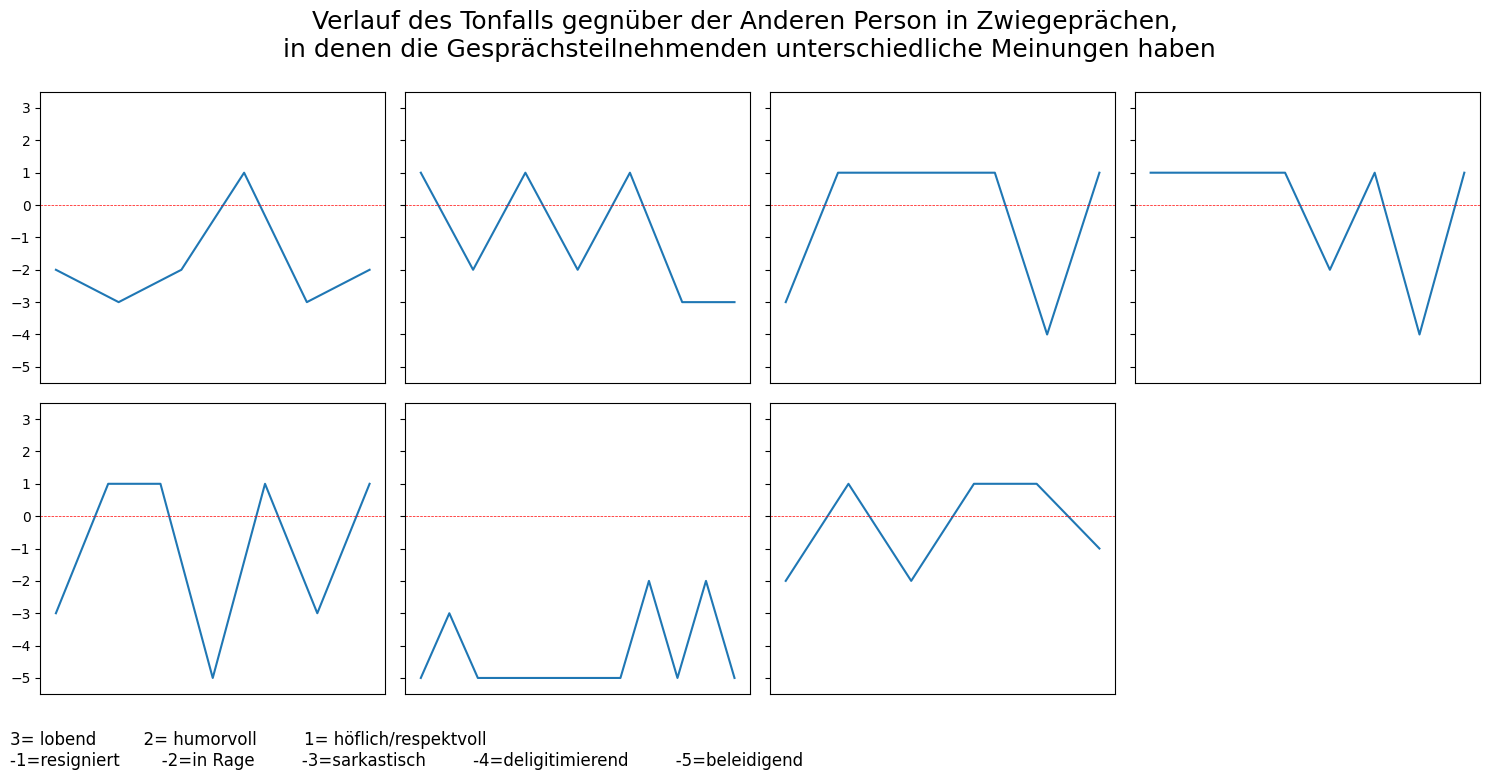

In [19]:
def plot_tone(contrary):
    grouped_df = contrary.groupby(['4: tree_id', '11: path'])
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
    fig. suptitle('Verlauf des Tonfalls gegnüber der Anderen Person in Zwiegeprächen,\n in denen die Gesprächsteilnehmenden unterschiedliche Meinungen haben', fontsize=18)
    y_min, y_max = -5, 3
    disagree = pd.DataFrame(columns=contrary.columns)
    for i, group in grouped_df:
        if len(group)>5:
            disagree= pd.concat([disagree, group])
    disagree = disagree.groupby(['4: tree_id', '11: path'])
    print(disagree.ngroups)
    for (name, group), ax in zip(disagree, axes.flatten()):  
        ax.plot(group['var_tone'])
        ax.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
    axes[1, 3].axis('off')
    for ax in axes[:, 0:].flatten():
        ax.set_ylim(bottom=-5.5, top=3.5)
        ax.set_xticklabels([])
        ax.set_xticks([])
    for ax in axes[:, 1:].flatten():
        ax.set_yticklabels([])

    text = "3= lobend \
        2= humorvoll \
        1= höflich/respektvoll \
        \n-1=resigniert\
        -2=in Rage \
        -3=sarkastisch \
        -4=deligitimierend \
        -5=beleidigend"
    
    fig.text(0.01, 0.03, text, ha='left', va='bottom', fontsize=12)
    plt.tight_layout(rect=[0, 0.1, 1, 0.98])   
    plt.show()
plot_tone(n_dis_df)

In [21]:
grouped_df = dis_df.groupby(['4: tree_id', '11: path'])
disagree = pd.DataFrame(columns=dis_df.columns)
for i, group in grouped_df:
    if len(group)>5:
        disagree= pd.concat([disagree, group])
disagree.to_excel('disagree_long.xlsx')

In [26]:
grouped_df = n_dis_df.groupby(['4: tree_id', '11: path'])
disagree = pd.DataFrame(columns=n_dis_df.columns)
for i, group in grouped_df:
    if len(group)>4:
        disagree= pd.concat([disagree, group])
disagree.to_excel('no_disagree_long.xlsx')